In [21]:
%load_ext autoreload
%autoreload 2 
from fibsem import utils, milling, acquire, constants 
from fibsem.microscope import FibsemMicroscope, ThermoMicroscope
from fibsem.structures import FibsemPatternSettings, FibsemPattern, FibsemImage, BeamType, FibsemStagePosition, Point
import matplotlib
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Connection & set up

In [22]:
microscope, settings = utils.setup_session(config_path= r"C:\Users\lnae0002\Desktop\fibsem\fibsem\config", protocol_path=r'C:\Users\lnae0002\Desktop\fibsem\example\protocol_autolamella.yaml')
assert isinstance(microscope, FibsemMicroscope)

2023-03-15 12:51:32,504 — root — INFO — connect_to_microscope:1896 — Microscope client connecting to [localhost:8300]
2023-03-15 12:51:32,508 — root — INFO — connect_to_microscope:1898 — Microscope client connected to [localhost:8300]
2023-03-15 12:51:32,508 — root — INFO — setup_session:227 — Finished setup for session: autolamella_demo_2023-03-15-12-51-32PM


In [23]:
def plot_images(eb_image, ib_image):    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    ax[0].imshow(eb_image.data, cmap="gray")
    ax[0].set_title("Electron Image")
    ax[1].imshow(ib_image.data, cmap="gray")
    ax[1].set_title("Ion Image")
    plt.show()

Acquire images

2023-03-15 12:51:32,825 — root — INFO — acquire_image:1910 — acquiring new ELECTRON image.
2023-03-15 12:51:35,448 — root — INFO — acquire_image:1910 — acquiring new ION image.
2023-03-15 12:51:38,141 — root — INFO — acquire_image:1910 — acquiring new ELECTRON image.
2023-03-15 12:51:40,724 — root — INFO — acquire_image:1910 — acquiring new ION image.


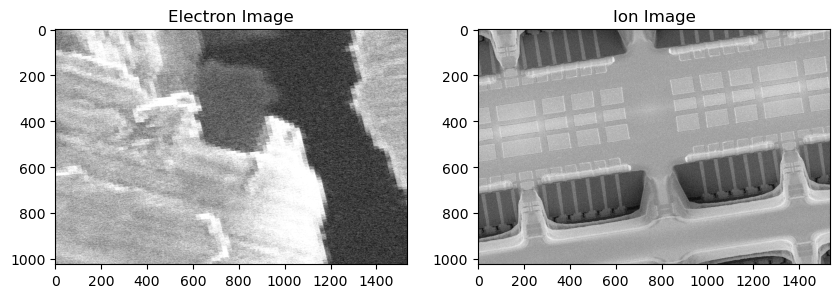

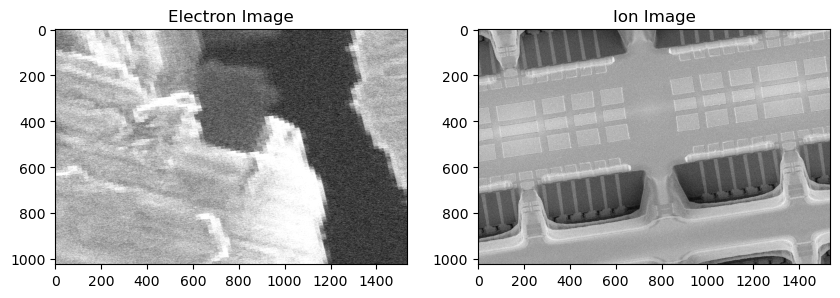

In [24]:
settings.image.autocontrast = False
settings.image.beam_type = BeamType.ELECTRON
eb_image = acquire.new_image(microscope, settings.image)
settings.image.beam_type = BeamType.ION
ib_image = acquire.new_image(microscope, settings.image)
ref_images = acquire.take_reference_images(microscope, settings.image)

plot_images(eb_image, ib_image)
plot_images(ref_images[0], ref_images[1])




In [25]:
assert isinstance(eb_image, FibsemImage)
assert isinstance(ib_image, FibsemImage)
assert isinstance(ref_images[0], FibsemImage)
assert isinstance(ref_images[1], FibsemImage)
assert ib_image.metadata.compare_image_settings(settings.image)
assert ref_images[1].metadata.compare_image_settings(settings.image)
assert eb_image.metadata.version == "v1"
assert ib_image.metadata.version == "v1"
assert ref_images[0].metadata.version == "v1"
assert ref_images[1].metadata.version == "v1"
assert eb_image.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ELECTRON)
assert ib_image.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ION)
assert ref_images[0].metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ELECTRON)
assert ref_images[1].metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ION)
assert eb_image.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ELECTRON)
assert ib_image.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ION)
assert ref_images[0].metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ELECTRON)
assert ref_images[1].metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ION)
assert eb_image.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ELECTRON)
assert ib_image.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ION)
assert ref_images[0].metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ELECTRON)
assert ref_images[1].metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ION)
if isinstance(microscope, ThermoMicroscope):
    assert eb_image.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ELECTRON)
    assert ib_image.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ION)
    assert ref_images[0].metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ELECTRON)
    assert ref_images[1].metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ION)

Last image

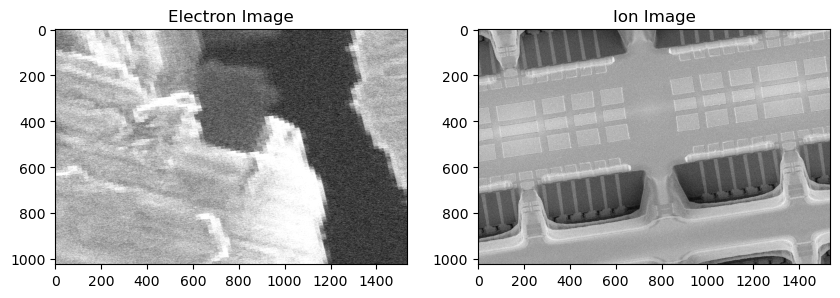

In [26]:
last_eb = microscope.last_image(beam_type=BeamType.ELECTRON)
last_ib = microscope.last_image(beam_type=BeamType.ION)

plot_images(last_eb, last_ib)


In [27]:
assert isinstance(last_eb, FibsemImage)
assert isinstance(last_ib, FibsemImage)
assert last_ib.metadata.compare_image_settings(settings.image)
assert last_eb.metadata.version == "v1"
assert last_ib.metadata.version == "v1"
assert last_eb.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ELECTRON)
assert last_ib.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ION)
assert last_eb.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ELECTRON)
assert last_ib.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ION)
assert last_eb.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ELECTRON)
assert last_ib.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ION)
if isinstance(microscope, ThermoMicroscope):
    assert last_eb.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ELECTRON)
    assert last_ib.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ION)

Auto contrast and autofocus

In [28]:
microscope.auto_focus(beam_type=BeamType.ELECTRON)
microscope.autocontrast(beam_type=BeamType.ION)
microscope.autocontrast(beam_type=BeamType.ELECTRON)

2023-03-15 12:53:15,490 — root — INFO — autocontrast:2167 — Running autocontrast on ION.
2023-03-15 12:53:17,514 — root — INFO — autocontrast:2167 — Running autocontrast on ELECTRON.


Beam shift

In [29]:
microscope.reset_beam_shifts()
microscope.beam_shift(dx=1e-6, dy=1e-6, beam_type=BeamType.ELECTRON)
microscope.reset_beam_shifts()

2023-03-15 12:53:21,508 — root — INFO — beam_shift:2212 — ELECTRON shifting by (1e-06, 1e-06)


## Movement

Absolute & Relative movement

In [30]:
import math 
abs_position = FibsemStagePosition(x=0.001, y=0.001, z=0.060, r = 0.1, t = 0.1)
microscope.move_stage_absolute(abs_position)
current_position = microscope.get_stage_position()
assert current_position.x == abs_position.x
assert current_position.y == abs_position.y
assert current_position.z == abs_position.z
assert math.isclose(current_position.r, abs_position.r, abs_tol=1e-6)
assert math.isclose(current_position.t, abs_position.t, abs_tol=1e-6)

rel_position = FibsemStagePosition(x=0.001, y=0.001, z=0.001, r = 0.05, t = 0.05)
microscope.move_stage_relative(rel_position)
current_position2 = microscope.get_stage_position()
assert current_position2.x == (current_position.x + rel_position.x)
assert current_position2.y == (current_position.y + rel_position.y)
assert current_position2.z == (current_position.z + rel_position.z)
assert math.isclose(current_position2.r, (current_position.r + rel_position.r), abs_tol=1e-6)
assert math.isclose(current_position2.t, (current_position.t + rel_position.t), abs_tol=1e-6)

2023-03-15 12:53:21,690 — root — INFO — move_stage_absolute:2308 — Moving stage to FibsemStagePosition(x=0.001, y=0.001, z=0.06, r=0.1, t=0.1, coordinate_system=None).
2023-03-15 12:53:23,546 — root — INFO — move_stage_relative:2334 — Moving stage by FibsemStagePosition(x=0.001, y=0.001, z=0.001, r=0.05, t=0.05, coordinate_system=None).
2023-03-15 12:53:23,548 — root — INFO — move_stage_absolute:2308 — Moving stage to FibsemStagePosition(x=0.002, y=0.002, z=0.061, r=0.14999999999462033, t=0.14999999999462033, coordinate_system='raw').


Move flat to beam

In [31]:
microscope.move_flat_to_beam(settings, beam_type=BeamType.ELECTRON)
assert math.isclose(microscope.get_stage_position().t, settings.system.stage.tilt_flat_to_electron, abs_tol=1e-6)
microscope.move_flat_to_beam(settings, beam_type=BeamType.ION)
assert math.isclose(microscope.get_stage_position().t, settings.system.stage.tilt_flat_to_ion*constants.DEGREES_TO_RADIANS , abs_tol=1e-6)

2023-03-15 12:53:24,439 — root — INFO — move_flat_to_beam:2493 — Moving Stage Flat to ELECTRON Beam
2023-03-15 12:53:24,885 — root — INFO — move_flat_to_beam:2493 — Moving Stage Flat to ION Beam


Stable and Eucentric moves

In [32]:
microscope.stable_move(settings, beam_type=BeamType.ELECTRON, dx=10e-6, dy=10e-6)
microscope.eucentric_move(settings, dy=10e-6)

#### Visual check ####

Stage tilt: 0.9075712110370514, corrected pretilt: 0.0, y_move: -1.624269245482744e-05 z_move: -1.279941632193079e-05
2023-03-15 12:53:26,909 — root — INFO — stable_move:2378 — moving stage (ELECTRON): FibsemStagePosition(x=-1e-05, y=-1.624269245482744e-05, z=-1.279941632193079e-05, r=0, t=0, coordinate_system=None)
2023-03-15 12:53:26,910 — root — INFO — move_stage_relative:2334 — Moving stage by FibsemStagePosition(x=-1e-05, y=-1.624269245482744e-05, z=-1.279941632193079e-05, r=0, t=0, coordinate_system=None).
2023-03-15 12:53:26,912 — root — INFO — move_stage_absolute:2308 — Moving stage to FibsemStagePosition(x=0.00199, y=0.0019837573075451725, z=0.06098720058367807, r=0.15000000000065714, t=0.9075712110370514, coordinate_system='raw').
2023-03-15 12:53:27,063 — root — INFO — eucentric_move:2405 — eucentric movement: 1.269018215072579e-05
2023-03-15 12:53:27,064 — root — INFO — move_stage_relative:2334 — Moving stage by FibsemStagePosition(x=0, y=0, z=1.269018215072579e-05, r=0, t=

## Microscope state 

In [33]:
current_state = microscope.get_current_microscope_state()
current_position = microscope.get_stage_position()
assert current_state.absolute_position.x == current_position.x
assert current_state.absolute_position.y == current_position.y
assert current_state.absolute_position.z == current_position.z
assert math.isclose(current_state.absolute_position.r, current_position.r, abs_tol=1e-6)
assert math.isclose(current_state.absolute_position.t, current_position.t, abs_tol=1e-6)
assert math.isclose(current_state.eb_settings.beam_current, microscope.get("current", beam_type=BeamType.ELECTRON), abs_tol=1e-6)
assert math.isclose(current_state.ib_settings.beam_current, microscope.get("current", beam_type=BeamType.ION), abs_tol=1e-6)
assert current_state.eb_settings.working_distance == microscope.get("working_distance", beam_type=BeamType.ELECTRON)
assert current_state.eb_settings.hfw == microscope.get("hfw", beam_type=BeamType.ELECTRON)
assert current_state.ib_settings.hfw == microscope.get("hfw", beam_type=BeamType.ION)


## Milling 

Line pattern

In [40]:
line = FibsemPatternSettings(
    pattern= FibsemPattern.Line,
    start_x=0.0,
    start_y=0.0,
    end_x=20e-6,
    end_y=20e-6,
    depth=1e-6,
)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=[line],
    drift_correction=False,
)

2023-03-15 12:54:17,680 — root — INFO — run_milling:2590 — running ion beam milling now...
 |----------------------------------------------------------------------------------------------------| 0% 
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100% Finished

2023-03-15 12:54:18,705 — root — INFO — finish_milling:74 — changing to imaging current: 2.00e-11
2023-03-15 12:54:18,707 — root — INFO — finish_milling:76 — finished ion beam milling.


Rectangle pattern

In [35]:
rectangle = FibsemPatternSettings(
    pattern= FibsemPattern.Rectangle,
    centre_x = 0.0,
    centre_y = 0.0,
    width = 20e-6,
    height = 20e-6,
    depth = 1e-6,
)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=[rectangle],
    drift_correction=False,
)

2023-03-15 12:53:29,028 — root — INFO — draw_rectangle:2738 — Scan direction TopToBottom not supported. Using Flyback instead.
2023-03-15 12:53:29,029 — root — INFO — draw_rectangle:2739 — Supported scan directions are: Flyback, RLE, SpiralInsideOut, SpiralOutsideIn, ZigZag
2023-03-15 12:53:29,032 — root — INFO — run_milling:2590 — running ion beam milling now...
 |----------------------------------------------------------------------------------------------------| 0% 
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100% Finished

2023-03-15 12:53:30,054 — root — INFO — finish_milling:74 — changing to imaging current: 2.00e-11
2023-03-15 12:53:30,055 — root — INFO — finish_milling:76 — finished ion beam milling.


Circle pattern

In [36]:
circle = FibsemPatternSettings(
    pattern= FibsemPattern.Circle,
    centre_x = 0.0,
    centre_y = 0.0,
    radius = 10e-6,
    depth = 1e-6,
)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=[circle],
    drift_correction=False,
)

2023-03-15 12:53:30,229 — root — INFO — run_milling:2590 — running ion beam milling now...
 |----------------------------------------------------------------------------------------------------| 0% 
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100% Finished

2023-03-15 12:53:31,254 — root — INFO — finish_milling:74 — changing to imaging current: 2.00e-11
2023-03-15 12:53:31,255 — root — INFO — finish_milling:76 — finished ion beam milling.


Trench pattern

In [37]:
patterns = []
for i, protocol in enumerate(
            settings.protocol["lamella"]["protocol_stages"]
        ):
        protocol["milling_depth"] = 0.1e-6
        lower_pattern_settings, upper_pattern_settings = milling.extract_trench_parameters(protocol, Point(0, 0))
        patterns.append(lower_pattern_settings)
        patterns.append(upper_pattern_settings)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=patterns,
    drift_correction=False,
)




2023-03-15 12:53:31,409 — root — INFO — draw_rectangle:2738 — Scan direction BottomToTop not supported. Using Flyback instead.
2023-03-15 12:53:31,409 — root — INFO — draw_rectangle:2739 — Supported scan directions are: Flyback, RLE, SpiralInsideOut, SpiralOutsideIn, ZigZag
2023-03-15 12:53:31,411 — root — INFO — draw_rectangle:2738 — Scan direction BottomToTop not supported. Using Flyback instead.
2023-03-15 12:53:31,411 — root — INFO — draw_rectangle:2739 — Supported scan directions are: Flyback, RLE, SpiralInsideOut, SpiralOutsideIn, ZigZag
2023-03-15 12:53:31,412 — root — INFO — draw_rectangle:2738 — Scan direction BottomToTop not supported. Using Flyback instead.
2023-03-15 12:53:31,414 — root — INFO — draw_rectangle:2739 — Supported scan directions are: Flyback, RLE, SpiralInsideOut, SpiralOutsideIn, ZigZag
2023-03-15 12:53:31,415 — root — INFO — draw_rectangle:2738 — Scan direction BottomToTop not supported. Using Flyback instead.
2023-03-15 12:53:31,415 — root — INFO — draw_rec

## Sputter platinum

In [38]:
protocol = {
    
}
protocol["hfw"] = 150e-6
protocol["beam_current"] = 2e-9
protocol["spot_size"] = 0.1e-6
protocol["dwell_time"] = 0.1e-6

microscope.setup_sputter(
    protocol
)
microscope.draw_sputter_pattern(
    hfw = 150e-6,
    line_pattern_length = 20e-6,
)
microscope.run_sputter()
microscope.finish_sputter()

2023-03-15 12:54:10,650 — root — INFO — run_sputter:2937 — Sputtering with platinum started.
 |----------------------------------------------------------------------------------------------------| 0% 
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100% Finished

2023-03-15 12:54:12,750 — root — INFO — finish_sputter:2974 — Platinum sputtering process completed.


## Get/Set parameters

In [39]:
#microscope.set